In [19]:
# Dependenceis
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time

In [20]:
# MAC user: 
#https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver


/usr/local/bin/chromedriver


In [21]:
#executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
#browser = Browser('chrome', **executable_path, headless=False)

# Initialize browser
#def init_browser():
# using the output above to define our executable path with splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [22]:
# Identifying the website to be scrapped and establishing a connection
url = 'https://www.google.com/search?q=finance&rlz=1C5CHFA_enUS840US848&oq=S%26P+live+ticker&aqs=chrome.0.0.6151j1j8&sourceid=chrome&ie=UTF-8&stick=H4sIAAAAAAAAAOPQeMSozC3w8sc9YSmpSWtOXmMU4RJyy8xLzEtO9UnMS8nMSw9ITE_lAQCCiJIYKAAAAA&tbm=fin&sa=X&ved=2ahUKEwjV7I6v65bkAhVnUd8KHSwCBZgQ6M8CMAB6BAgPEAI'
browser.visit(url)

In [23]:
# Creating a beautifulsoup object and parsing this object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

<div data-hveid="48" data-ved="0ahUKEwiHm8DP8JbkAhWLc98KHQvIBMwQkt4BCDAoAA" id="kp-wp-tab-MARKET_SUMMARY" jsname="QvTDgf"><div class="xT4Cue" style="width:0"><div class="zmhDub" data-hveid="49" data-ved="0ahUKEwiHm8DP8JbkAhWLc98KHQvIBMwQotoCCDE"><div data-hveid="50" data-ved="0ahUKEwiHm8DP8JbkAhWLc98KHQvIBMwQo7QCCDIoAA"><div aria-level="2" class="rKFBM gsrt wp-ms" role="heading"><div class="HnYYW">You may be interested in</div></div><div class="vnLNtd mnr-c B03h3d ptcLIOszQJu__wholepage-card wp-ms" data-hveid="52"><div class="UDZeY"><div class="mod" data-md="231"><!--m--><div data-hveid="53"><div class="ML43Jb fw-wli bm7Wje" data-mid="/m/0cqyw"><g-link><a class="a-no-hover-decoration" href="/search?sa=X&amp;rlz=1C5CHFA_enUS840US848&amp;tbm=fin&amp;q=INDEXDJX:+.DJI&amp;stick=H4sIAAAAAAAAAONgecRozC3w8sc9YSmtSWtOXmNU4eIKzsgvd80rySypFBLjYoOyeKS4uDj0c_UNkgsry3kWsfJ5-rm4Rrh4RVgp6Ll4eQIAqJT5uUkAAAA&amp;ved=0ahUKEwiHm8DP8JbkAhWLc98KHQvIBMwQlq4CCDYwAA"><div class="ML43Jb CPqeke"><span class="z4
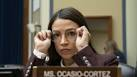
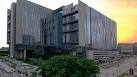
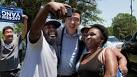
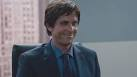
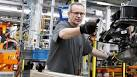
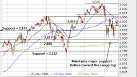
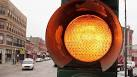
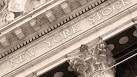
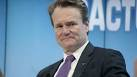
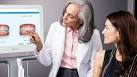
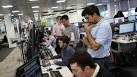
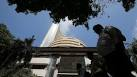
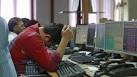
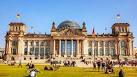
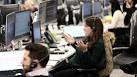

In [78]:
# Scraping for the DJI, S&P, & NASDAQ trade volume and current gain/loss standing
tickers = soup.find_all('div', id = "kp-wp-tab-MARKET_SUMMARY")
print(tickers[0])


In [105]:
long_names = soup.find_all('span', class_ = "z4Fov")
shares_traded = soup.find_all('span', class_ = "Z90tFb")
changes = soup.find_all('span', class_ = "hO8Bcf")
print(long_names[0].text)
print(shares_traded[0].text)
print(changes[0].text)


Dow Jones Industrial Average
26,258.27
+55.54 (0.21%)


In [93]:
len(long_names)

19

In [94]:
len(shares_traded)

19

In [107]:
for x in range(len(long_names)):
    print(long_names[x].text, shares_traded[x].text, changes[x].text)

Dow Jones Industrial Average 26,258.27 +55.54 (0.21%)
S&P 500 Index 2,920.95 −3.48 (0.12%)
Apple Inc. 212.44 USD −0.20 (0.094%)
Dow Jones Industrial Average 26,258.27 +55.54 (0.21%)
S&P 500 Index 2,920.95 −3.48 (0.12%)
Nasdaq Composite 7,981.34 −38.87 (0.48%)
Russell 2000 Index 1,505.75 −4.10 (0.27%)
Dow Jones Industrial Average 26,258.27 +55.54 (0.21%)
DAX PERFORMANCE-INDEX 11,747.04 −55.81 (0.47%)
BSE SENSEX 36,472.93 −587.44 (1.59%)
FTSE 100 Index 7,128.18 −75.79 (1.05%)
IBEX 35 8,716.40 +14.90 (0.17%)
Closed: 4:17 PM UTC 1.11 −0.00046 (0.042%)
Closed: 4:16 PM UTC 106.48 −0.13 (0.12%)
Closed: 4:16 PM UTC 1.23 +0.012 (0.98%)
Closed: 4:17 PM UTC 1.33 +0.00050 (0.038%)
Closed: 4:16 PM UTC 7.84 −0.0026 (0.034%)
Closed: 4:16 PM UTC 7.08 +0.020 (0.29%)
Closed: 4:17 PM UTC 0.68 −0.0023 (0.34%)


In [108]:
print(long_names[0].text, shares_traded[0].text, changes[0].text)
print(long_names[1].text, shares_traded[1].text, changes[1].text)
print(long_names[5].text, shares_traded[5].text, changes[5].text)
print(long_names[6].text, shares_traded[6].text, changes[6].text)

Dow Jones Industrial Average 26,258.27 +55.54 (0.21%)
S&P 500 Index 2,920.95 −3.48 (0.12%)
Nasdaq Composite 7,981.34 −38.87 (0.48%)
Russell 2000 Index 1,505.75 −4.10 (0.27%)
